# Regresion lineal

## Actividad:

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos,tendencias, etc.

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

5. Entrenar el modelo configurando los diferentes hiperparámetros

6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

8. Interpretar, analizar y documentar los resultados obtenidos

# 1.

In [180]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import warnings
warnings.filterwarnings('ignore')

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# lectura de datos en Python y lo cargamos en la variable Datos
Datos = pd.read_csv('C:\\Users\\usuario\\Desktop\\Data set tarea 2\\car details v3.csv')
# Realizamos lectura de los Datos para el análisis exploratorio
Datos.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [181]:
# Descripción de los datos
Datos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [182]:
#Identificación de Datos Faltantes
Datos.isnull().sum()*100/Datos.shape[0]
# no hay valores faltantes, esta limpio.

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

In [183]:
# utilizamos el siguiente código para que se nos muestre las columnas del dataset que contienen valores vacíos.
for column in Datos.columns:
    missing_values = Datos[column].isna().sum()
    print("Cantidad de valores faltantes en {}: {}".format(column, missing_values))

Cantidad de valores faltantes en name: 0
Cantidad de valores faltantes en year: 0
Cantidad de valores faltantes en selling_price: 0
Cantidad de valores faltantes en km_driven: 0
Cantidad de valores faltantes en fuel: 0
Cantidad de valores faltantes en seller_type: 0
Cantidad de valores faltantes en transmission: 0
Cantidad de valores faltantes en owner: 0
Cantidad de valores faltantes en mileage: 221
Cantidad de valores faltantes en engine: 221
Cantidad de valores faltantes en max_power: 215
Cantidad de valores faltantes en torque: 222
Cantidad de valores faltantes en seats: 221


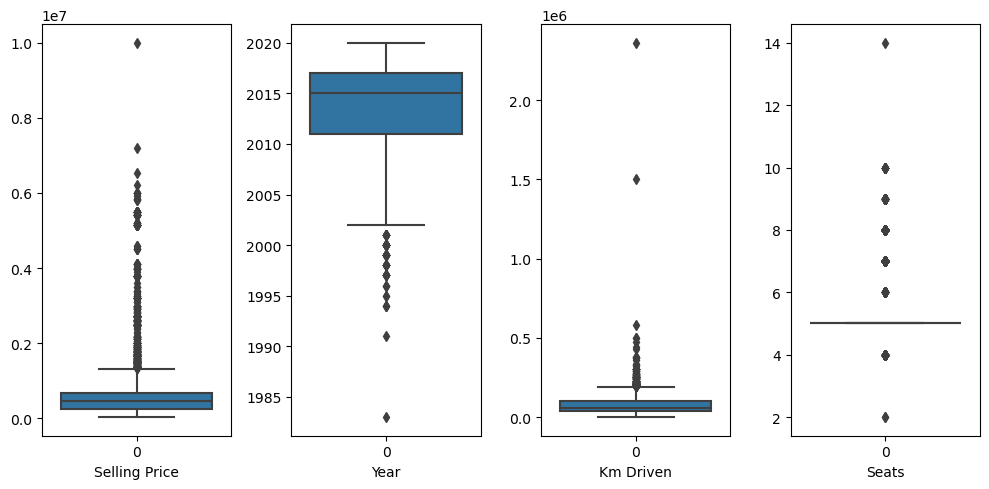

In [184]:
# Análisis de valores atípicos
fig, axs = plt.subplots(1,4, figsize = (10,5))
plt1 = sns.boxplot(Datos['selling_price'], ax = axs[0])
plt2 = sns.boxplot(Datos['year'], ax = axs[1])
plt3 = sns.boxplot(Datos['km_driven'], ax = axs[2])
plt4= sns.boxplot(Datos['seats'], ax = axs[3])
axs[0].set_xlabel('Selling Price')
axs[1].set_xlabel('Year')
axs[2].set_xlabel('Km Driven')
axs[3].set_xlabel('Seats')

plt.tight_layout()

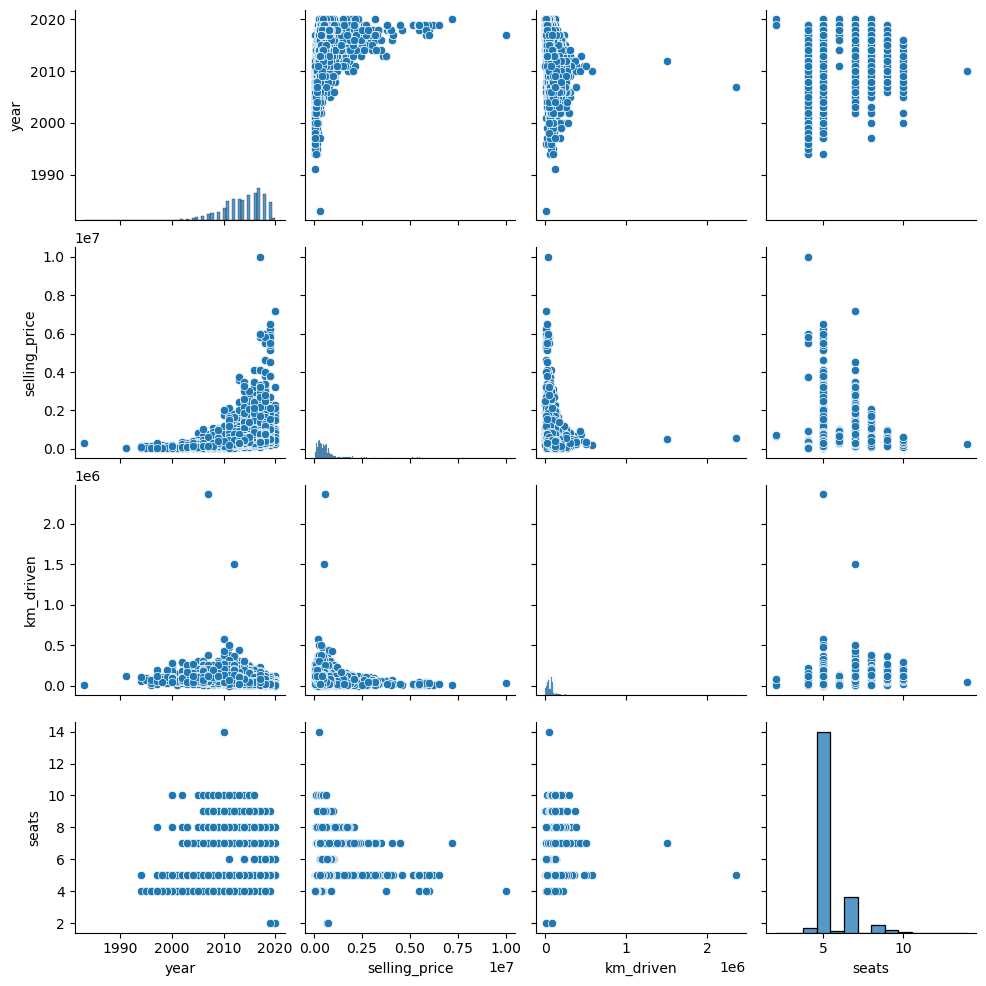

In [185]:
# visualización de datos numericos
sns.pairplot(Datos)
plt.show()

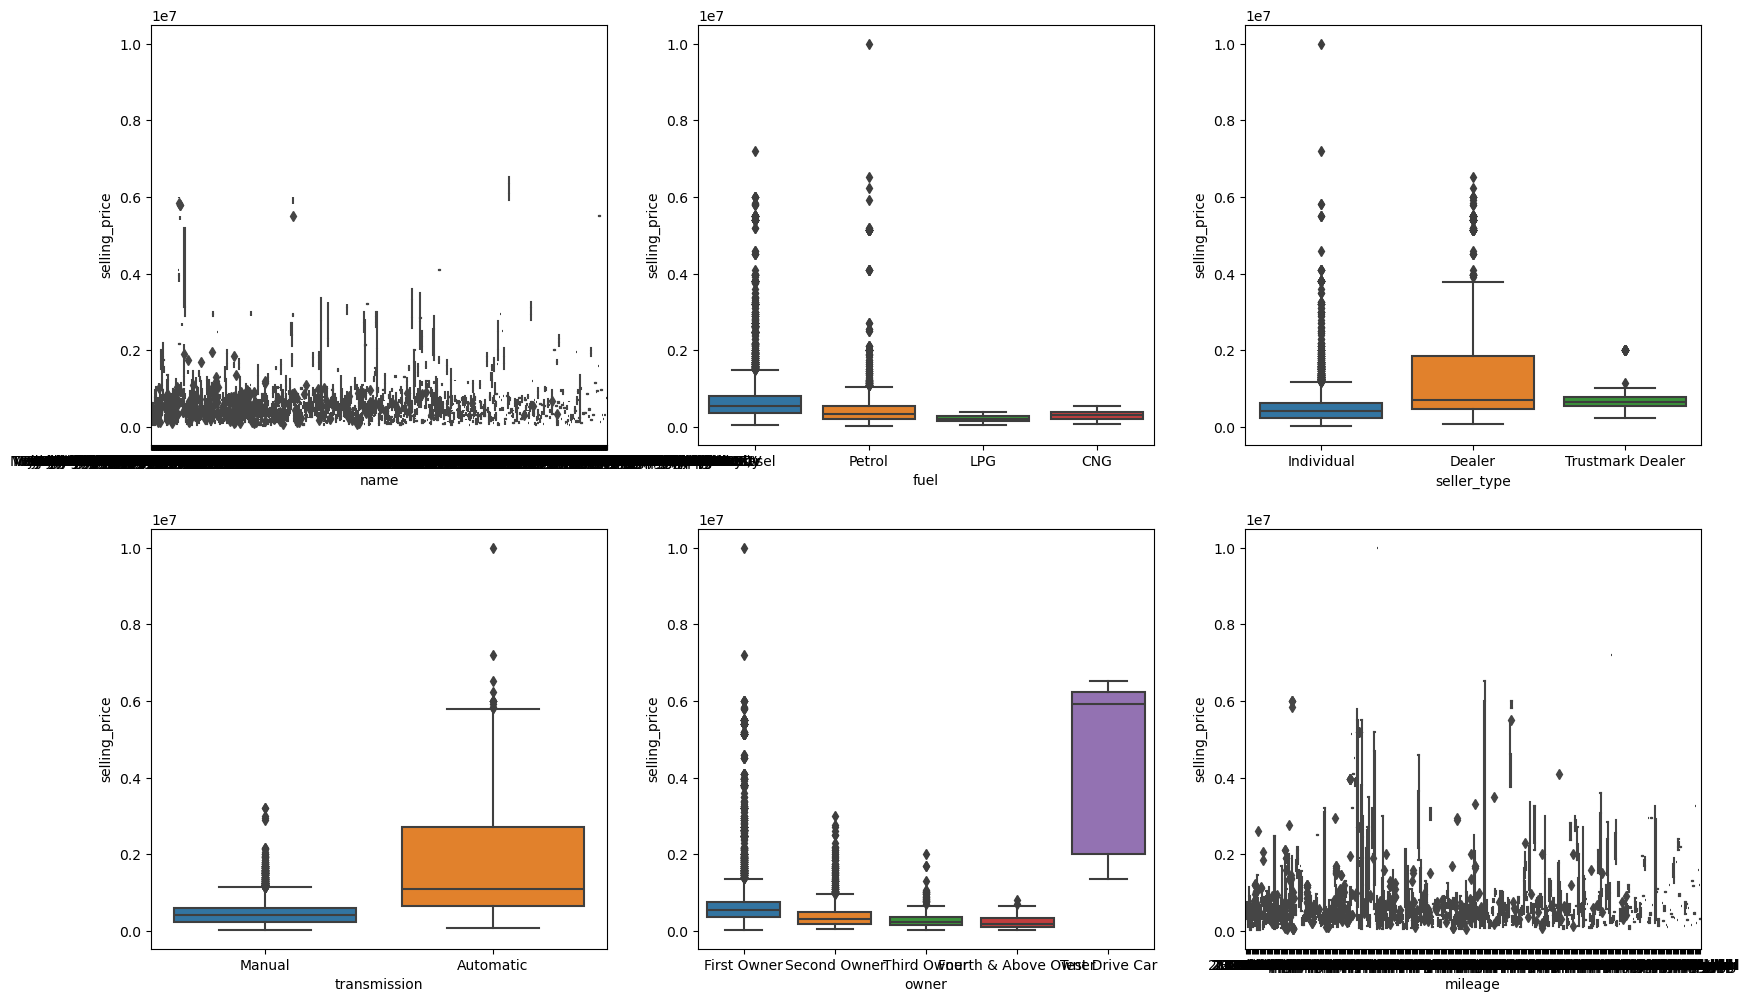

In [186]:
#Vamos a visualizar las variables categoricas
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'name', y = 'selling_price', data = Datos)
plt.subplot(2,3,2)
sns.boxplot(x = 'fuel', y = 'selling_price', data = Datos)
plt.subplot(2,3,3)
sns.boxplot(x = 'seller_type', y = 'selling_price', data = Datos)
plt.subplot(2,3,4)
sns.boxplot(x = 'transmission', y = 'selling_price', data = Datos)
plt.subplot(2,3,5)
sns.boxplot(x = 'owner', y = 'selling_price', data = Datos)
plt.subplot(2,3,6)
sns.boxplot(x = 'mileage', y = 'selling_price', data = Datos)
plt.show()

# 2.

In [187]:
# utilizamos el siguiente código para reemplazar los valores faltantes de las columnas reemplazándolos por la moda presente en cada columna
for column in ['mileage', 'engine', 'max_power', 'torque', 'seats']:
    Datos[column].fillna(Datos[column].mode()[0], inplace=True)

In [188]:
# verificamos que ya no queden valores faltantes en las columnas.
for column in Datos.columns:
    missing_values = Datos[column].isna().sum()
    print("Cantidad de valores faltantes en {}: {}".format(column, missing_values))

Cantidad de valores faltantes en name: 0
Cantidad de valores faltantes en year: 0
Cantidad de valores faltantes en selling_price: 0
Cantidad de valores faltantes en km_driven: 0
Cantidad de valores faltantes en fuel: 0
Cantidad de valores faltantes en seller_type: 0
Cantidad de valores faltantes en transmission: 0
Cantidad de valores faltantes en owner: 0
Cantidad de valores faltantes en mileage: 0
Cantidad de valores faltantes en engine: 0
Cantidad de valores faltantes en max_power: 0
Cantidad de valores faltantes en torque: 0
Cantidad de valores faltantes en seats: 0


In [189]:
# configuramos el siguiente conteo para identificar datos atípicos en los precios.
nivel_minimo=30000
nivel_maximo=9999999
Total_Atipicos=((Datos['selling_price']<nivel_minimo)|(Datos['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [190]:
# filtramos los datos atípicos identificados
Datos=Datos[(Datos['selling_price']<nivel_maximo)&(Datos['selling_price']>nivel_minimo)]
# verificamos que los datos atípicos se elimanarn
Total_Atipicos=((Datos['selling_price']<nivel_minimo)|(Datos['selling_price']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [191]:
#Revisión del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8124 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8124 non-null   object 
 1   year           8124 non-null   int64  
 2   selling_price  8124 non-null   int64  
 3   km_driven      8124 non-null   int64  
 4   fuel           8124 non-null   object 
 5   seller_type    8124 non-null   object 
 6   transmission   8124 non-null   object 
 7   owner          8124 non-null   object 
 8   mileage        8124 non-null   object 
 9   engine         8124 non-null   object 
 10  max_power      8124 non-null   object 
 11  torque         8124 non-null   object 
 12  seats          8124 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 888.6+ KB


# 3.

In [192]:
# Total de autos por cada uno de los precios del mercado
Datos['selling_price'].value_counts()

selling_price
300000     227
600000     213
350000     209
550000     204
450000     195
          ... 
308000       1
3900000      1
2850000      1
39000        1
746000       1
Name: count, Length: 674, dtype: int64

# 4.

In [193]:
# Especificamos esto para que el conjunto de datos de entrenamiento y de prueba siempre tenga las mismas filas, respectivamente
np.random.seed(0)
df_train, df_test = train_test_split(Datos, train_size = 0.7, test_size = 0.3, random_state = 100)

In [194]:
# escalamos las variables no categoricas
num_vars = ['year', 'km_driven', 'selling_price', 'seats']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [195]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3489,Mahindra XUV500 W8 AWD,0.810811,0.096108,0.099400,Diesel,Individual,Manual,Second Owner,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,0.416667
744,Mahindra Bolero GLX,0.567568,0.030548,0.052702,Diesel,Individual,Manual,Third Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,0.250000
3520,Volvo XC40 D4 Inscription BSIV,0.972973,0.525736,0.012675,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,0.250000
3963,Maruti Swift Dzire VDI,0.810811,0.053564,0.068043,Diesel,Individual,Manual,Second Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,0.250000
1223,Renault KWID RXT Optional,0.972973,0.050774,0.006004,Petrol,Individual,Manual,First Owner,25.17 kmpl,799 CC,53.3 bhp,72Nm@ 4386rpm,0.250000


In [196]:
df_train.describe()

,year,selling_price,km_driven,seats
count,5686.000000,5686.000000,5686.000000,5686.000000
mean,0.832514,0.083445,0.045964,0.284676
std,0.108279,0.108855,0.034915,0.080139
min,0.000000,0.000000,0.000000,0.000000
25%,0.756757,0.030688,0.022682,0.250000
50%,0.864865,0.058446,0.039360,0.250000
75%,0.918919,0.089831,0.065377,0.250000
max,1.000000,1.000000,1.000000,1.000000


In [197]:
# Porcentaje de datos para entrenamiento (train) = 80% , y para prueba (test) = 20%
# Se crean variables X y Y para almacenar la información del entrenamiento
X = Datos.drop('selling_price',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['selling_price'] # Se cargan los datos de train con los datos de la la columna Diabetico
# Convertir características categóricas en variables dummy utilizando la codificación one-hot...

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=0)

In [198]:
print (X_train)

      year  km_driven  seats  name_Ambassador CLASSIC 1500 DSL AC  \
7438  2013     120000    5.0                                False   
7729  2008      70000    8.0                                False   
784   2006     120000    8.0                                False   
1929  2015      80000    5.0                                False   
7470  2017     127991    5.0                                False   
...    ...        ...    ...                                  ...   
4933  2000     100000    8.0                                False   
3266  2018      35000    5.0                                False   
1654  2017      90000    5.0                                False   
2609  2003     167000    5.0                                False   
2734  2014     148000    7.0                                False   

      name_Ambassador Classic 2000 DSZ AC PS  \
7438                                   False   
7729                                   False   
784                        

In [199]:
print (Y_train)

7438     300000
7729     160000
784      220000
1929     700000
7470     675000
         ...   
4933      80000
3266     780000
1654    1250000
2609      55000
2734     620000
Name: selling_price, Length: 6499, dtype: int64


# 5.

In [200]:
# Construimos el modelo de regresión lineal
modelo_regresion_lineal = LinearRegression()
modelo_regresion_lineal.fit(X_train, Y_train)
# Creamos el modelo de predicción 
predicciones = modelo_regresion_lineal.predict(X_test)

In [201]:
print (Y_test)

381      625000
3643     900000
274      300000
1030     450000
685      370000
         ...   
3537     850000
1644     420000
6497    1000000
6         96000
3177     825000
Name: selling_price, Length: 1625, dtype: int64


# 6.

In [202]:
# Desempeño del modelo de regresión
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(Y_test, predicciones)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 2.8079876921788643e+21


In [203]:
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(Y_test, predicciones)
print("Error absoluto medio (MAE):", mae)

Error absoluto medio (MAE): 7981733021.319772


In [204]:
# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(Y_test, predicciones)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): -4075920383.580468


# 7.

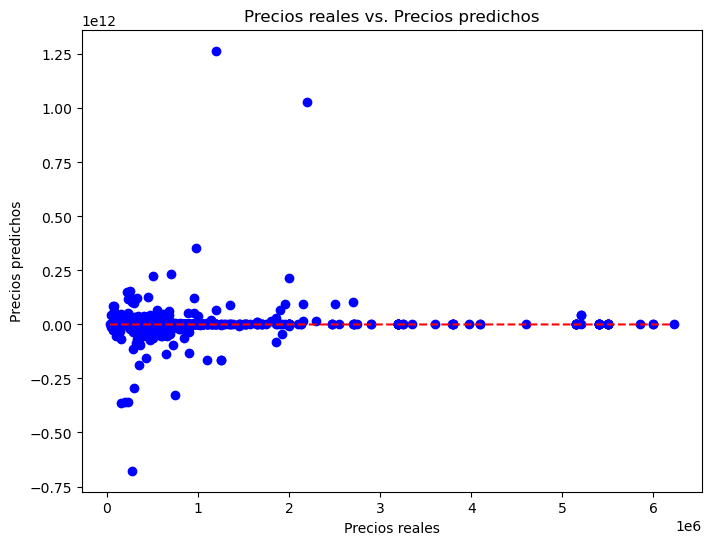

In [205]:
# Gráfico de dispersión de precios reales vs. precios predichos:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, predicciones, color='blue')
plt.title('Precios reales vs. Precios predichos')
plt.xlabel('Precios reales')
plt.ylabel('Precios predichos')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')  # Línea de referencia
plt.show()

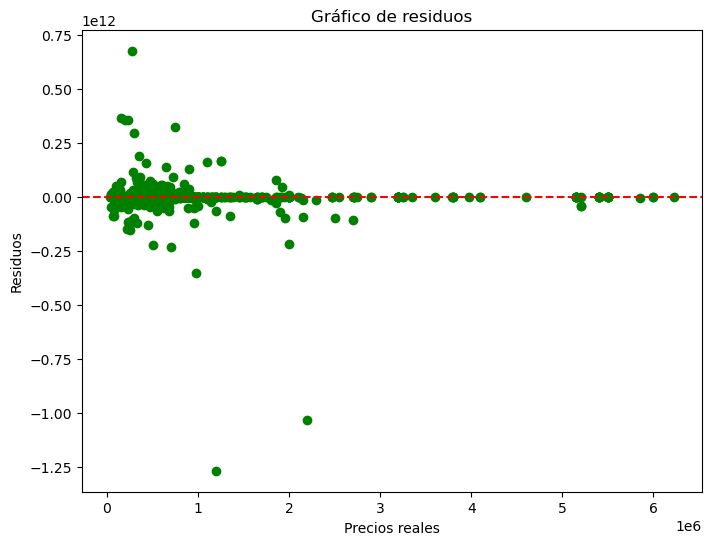

In [206]:
# Gráfico de residuos:
residuos = Y_test - predicciones
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, residuos, color='green')
plt.title('Gráfico de residuos')
plt.xlabel('Precios reales')
plt.ylabel('Residuos')
plt.axhline(y=0, color='red', linestyle='--')  # Línea horizontal en y=0
plt.show()

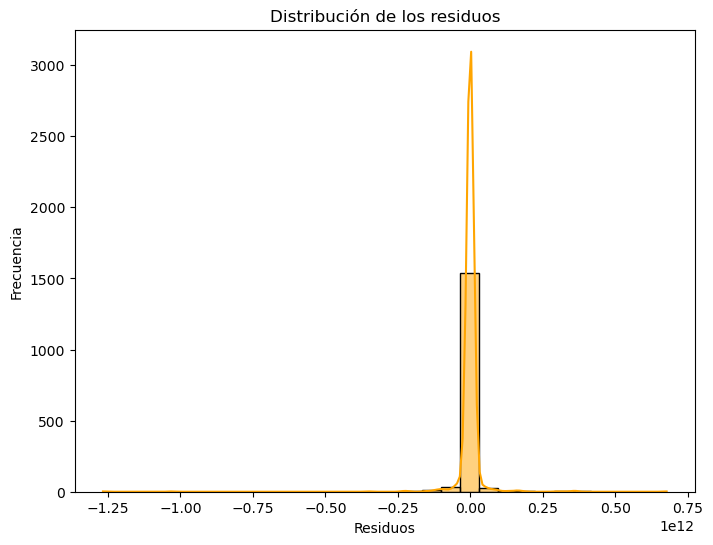

In [207]:
# Histograma de residuos:
plt.figure(figsize=(8, 6))
sns.histplot(residuos, bins=30, kde=True, color='orange')
plt.title('Distribución de los residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

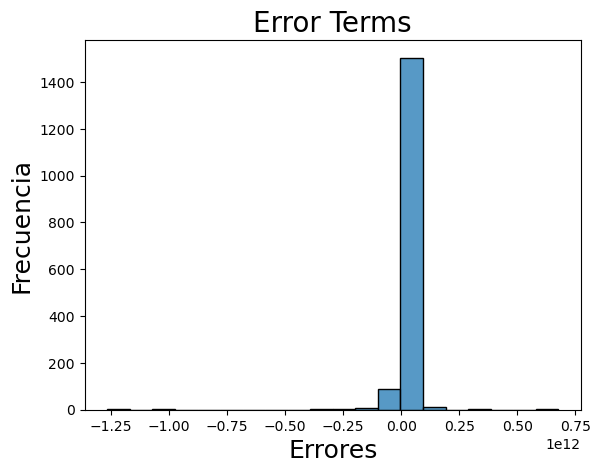

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot((Y_test - predicciones), bins=20)
plt.xlabel('Errores', fontsize=18)  
plt.ylabel('Frecuencia', fontsize=18)  # Agrega etiqueta al eje y si es necesario
plt.title('Error Terms', fontsize=20)  # Establece el título usando Matplotlib

plt.show()

# 8.

. Gráfico de dispersión de precios reales vs. precios predichos:
Al observar el gráfico, notamos que la mayoría de los puntos están bastante cerca de la línea de referencia (línea diagonal roja), lo que indica que las predicciones del modelo están en general cercanas a los valores reales. Sin embargo, hay algunas instancias donde las predicciones se alejan significativamente de los valores reales, especialmente en los extremos del rango de precios.
Verdaderos Negativos (Superior Izquierdo): El modelo predijo correctamente 36 casos como clase 0.

Falsos Positivos (Superior Derecho): El modelo predijo incorrectamente 4 casos como clase 1 cuando en realidad eran clase 0
.
Falsos Negativos (Inferior Izquierdo): El modelo predijo incorrectamente 5 casos como clase 0 cuando en realidad eran clase 
1.
Verdaderos Positivos (Inferior Derecho): El modelo predijo correctamente 29 casos como clase 1.

. Gráfico de residuos:
Los residuos, que son las diferencias entre los valores reales y los valores predichos, parecen estar distribuidos aleatoriamente alrededor de la línea horizontal en y=0. Esto sugiere que el modelo de regresión lineal puede estar capturando la mayoría de la variabilidad en los datos. No obstante, hay algunas áreas donde los residuos se desvían considerablemente de cero, indicando que el modelo puede estar sesgado en ciertos rangos de preci
El eje x, etiquetado como “Precios reales”, varía de 0 a 6e6, lo que sugiere que este gráfico podría estar relacionado con precios de bienes o servicios, posiblemente en el contexto de una regresión inmobiliaria o similar.

El eje y muestra los residuos, que varían de -1.25 a 0.75. Un residuo de cero indicaría una predicción perfecta
.
La línea roja discontinua cerca del cero en el eje y probablemente representa el punto donde las predicciones del modelo son exacta
s.
La dispersión aleatoria de los puntos verdes sugiere que no hay errores sistemáticos evidentes en el modelo utilizado para hacer las predicciones.os.

. Histograma de residuos:
Al observar la distribución de los residuos en el histograma, vemos que sigue aproximadamente una distribución normal. Este patrón es un buen indicador de que el modelo está capturando la mayor parte de la variabilidad en los datos y no está sesgado de manera signific
El eje x, etiquetado como “Residuos”, muestra un rango que va aproximadamente de -1.25 a 0.75. Esto indica la variación de los residuos, que son las diferencias entre los valores observados y los predichos por un modelo estadístico.

El eje y, etiquetado como “Frecuencia”, tiene valores que van de 0 a 3000, representando la cantidad de veces que se observa cada valor residual

grafico terminos de error:
El eje x, etiquetado como “Errores”, muestra un rango que va aproximadamente de -1.25 a 0.75. Esto indica la variación de los errores, que son las diferencias entre los valores observados y los predichos por un modelo estadístico.

El eje y, etiquetado como “Frecuencia”, tiene valores que van de 0 a aproximadamente 1400, representando la cantidad de veces que se observa cada término de error
.
Hay una barra azul prominente en la marca de 0 en el eje x, lo que indica una alta frecuencia de este término de error particular.
Todas las demás barras son muy cortas, lo que sugiere que esos términos de error tienen frecuencias mucho más baj
ado.ss.ativa.

Error cuadrático medio (MSE): Cuanto más cercano a cero sea el valor del MSE, mejor será el ajuste del modelo a los datos. Un MSE más alto indica que el modelo tiene una peor precisión.
Error absoluto medio (MAE): Cuanto más cercano a cero sea el valor del MAE, mejor será el ajuste del modelo a los datos. Un MAE más alto indica que el modelo tiene una peor precisión.
Coeficiente de determinación (R^2): Mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes. Un valor de R^2 cercano a 1 indica un buen ajuste del modelo a los datos, mientras que un valor cercano a 0 indica un ajuste deficiente.
En resumen, aunque el modelo parece capturar la tendencia general de los precios de los autos, existen algunas áreas de mejora, especialmente en la precisión de las predicciones en los extremos del rango de precios los valores extremadamente altos del MSE y MAE, junto con el R^2 negativo, indican que el modelo actual tiene áreas de mejora para obtener resultados mas precisos.



